In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Exploring the data

In [2]:
customers = pd.read_csv('Telco_Customers.csv')
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Remove the customerID column since I won't use it during data exploration/hypoth tests
customers = customers.drop(['customerID'], axis=1)
customers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Identify any missing values and how they are distributed in dataset
customers.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values, so I'm going to go ahead and explore the data.  

In [5]:
#High level overview of the basic summary stats of dataset
customers.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#Breakdown of customers by Gender
customers.groupby('gender').count()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,,,,,
Female,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488
Male,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555


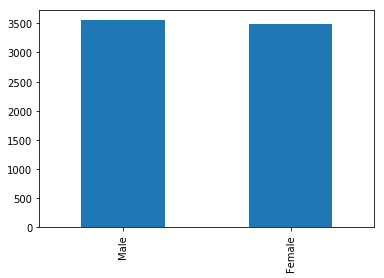

In [7]:
#Bar plot showing gender
customers.gender.value_counts().plot(kind='bar');

The breakdown of customer gender shows that the population is almost 50/50 male and female.  

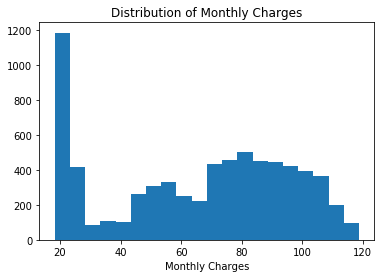

In [8]:
#Explore distribution of monthly charges
x = customers.MonthlyCharges
plt.hist(x,bins=20)
plt.xlabel('Monthly Charges')
plt.title('Distribution of Monthly Charges')
plt.show()

Looking at the distribution, it is obvious that there is a wide range of amounts (about 100 dollars).  By far the most frequent monthly charge is approximately 20 dollars, the lower end of the spectrum.  The statistical summary above shows the mean is 64.8 and the std is 30.1 with a median of 70.4.  

Here are some interesting questions derived from this plot:  
<ul> <li>Who is paying the lowest amount of money and who is paying the highest? </li>
    <li>What types of contracts do they have, and how long is their tenure? </li> 
    <li>Are females more likely to pay more than males? </li> </ul> 

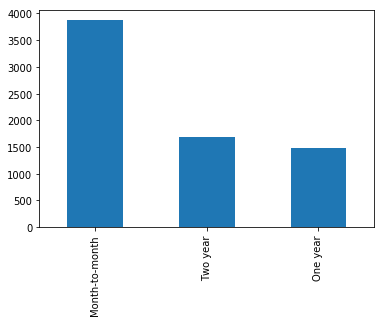

In [9]:
#Bar plot of contract types
customers.Contract.value_counts().plot(kind='bar');

Month-to-month is far exceeds the other contract types.  The cell below shows the actual numbers. 

In [10]:
#Counts by Contract type
customers.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

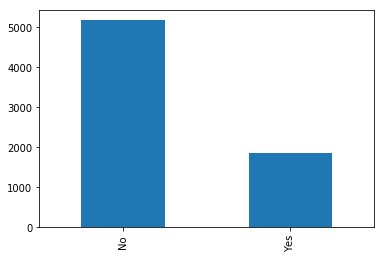

In [11]:
#Distribution of churn
customers.Churn.value_counts().plot(kind='bar');

I thought that examining the rate of customer churn in the last month would be interesting.  I was surprised to find that 1869/7043 customers left.  That is approx. 25% which seems like a large percent of customers to lose in one month.  Losing that much revenue in such a short amount of time would most likely have a large impact of the company.  So I'm choosing to explore this segment of the data a little further.  

In [12]:
#Churn value counts
customers.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
#Summary Stats of Churn
customers_churn = customers[customers.Churn == 'Yes']
customers_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332
std,0.435799,19.531123,24.666053
min,0.000000,1.000000,18.850000
25%,0.000000,2.000000,56.150000
50%,0.000000,10.000000,79.650000
75%,1.000000,29.000000,94.200000
max,1.000000,72.000000,118.350000


I wanted to get a high level overview of the summary stats of those customers who have left in the last month.  Similar to the monthly charges, the tenure ranges from one month to 6 years (72 months).  It would be useful to look at how long the churned customers were at Telco before they left.  

In [14]:
churn_contract = customers.loc[customers.Churn == 'Yes', 'Contract']
counts = churn_contract.value_counts()
counts

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

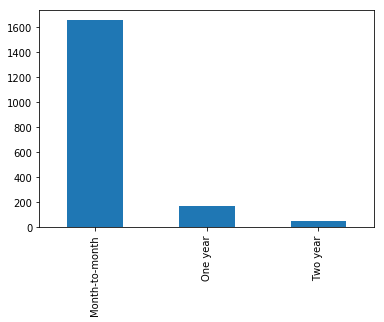

In [15]:
#Churn Count by Contract Type
churn_contract.value_counts().plot(kind='bar');

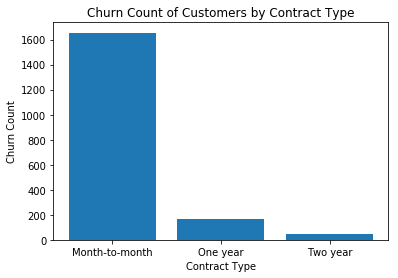

In [16]:
#Churn by Contract Type
contract_type = ['Month-to-month', 'One year', 'Two year']
counts = [1655, 166, 48]
plt.bar(contract_type, counts)
plt.xlabel('Contract Type')
plt.ylabel('Churn Count')
plt.title('Churn Count of Customers by Contract Type')
plt.show()

Of the churned customers, the month-to-month contract was the most popular.  This makes sense since there was no long term commitment and those customers could leave anytime.  

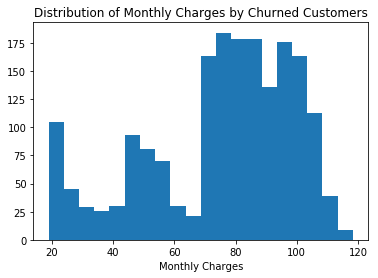

In [17]:
#Distribution of Monthly Charges by Customers who churned
churn_monthlycharges = customers.loc[customers.Churn == 'Yes', 'MonthlyCharges']

plt.hist(churn_monthlycharges, bins=20)
plt.xlabel('Monthly Charges')
plt.title('Distribution of Monthly Charges by Churned Customers')
plt.show()

This distribution shows that most of the churned customers were paying higher monthly charges.

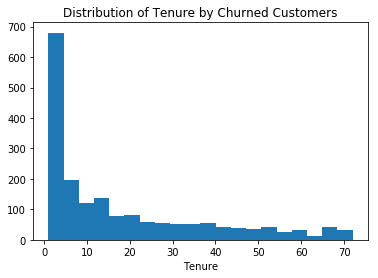

In [18]:
#Distribution tenure by Churned Customers
churn_tenure = customers.loc[customers.Churn == 'Yes', 'tenure']

plt.hist(churn_tenure, bins=20)
plt.xlabel('Tenure')
plt.title('Distribution of Tenure by Churned Customers')
plt.show()

This histogram shows that a large proportion of the churned customers had a tenure of less than 10 months.  

In [19]:
#Summary stats for churn tenure less than 10 months
ten_months = churn_tenure.loc[customers.tenure <= 10]
ten_months.describe()

count    968.000000
mean       3.467975
std        2.850463
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       10.000000
Name: tenure, dtype: float64

In [20]:
#Dataframe with churned customers on month-to-month contract
churn_month = customers_churn.loc[customers.Contract == 'Month-to-month']
churn_month.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


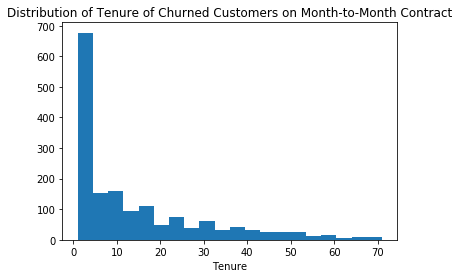

In [21]:
#Distribution of tenure by churned customers on month-to-month contract
plt.hist(churn_month.tenure, bins=20)
plt.xlabel('Tenure')
plt.title('Distribution of Tenure of Churned Customers on Month-to-Month Contract')
plt.show()

Month-to-month contracts had the highest turnover rate.  With this type of contract there is low customer retention. 

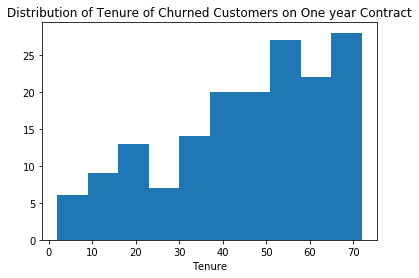

In [22]:
#Distribution of tenure by churned customers on one year contract
churn_one_year = customers_churn.loc[customers.Contract == 'One year']
plt.hist(churn_one_year.tenure, bins=10)
plt.xlabel('Tenure')
plt.title('Distribution of Tenure of Churned Customers on One year Contract')
plt.show()

This distribution suggests that churn rates begin to increase with length of time.  There are 166 customers in a one-year contract in this sample. 

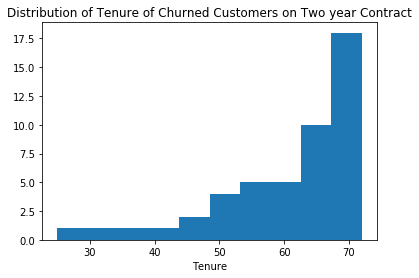

In [23]:
#Distribution of tenure by churned customers on one year contract
churn_two_year = customers_churn.loc[customers.Contract == 'Two year']
plt.hist(churn_two_year.tenure, bins=10)
plt.xlabel('Tenure')
plt.title('Distribution of Tenure of Churned Customers on Two year Contract')
plt.show()

This histogram, is left skewed, and shows that as tenure increases, so does the churn rate.  This sample is only 48 of the churned customers out of the total 1869. 

In [24]:
#Explore churn by gender
churn_gender = customers.loc[customers.Churn == 'Yes', 'gender']
churn_gender = churn_gender.value_counts()
churn_gender

Female    939
Male      930
Name: gender, dtype: int64

The genders of the churned customers are almost equivalent.  This is very interesting and prompts some further investigation.  

Some questions I would like to explore:
<ul><li>Is there a significant difference between the tenure of churned males and females?</li>
    <li>Of the churned customers, did one gender pay more for services than the other?</li>

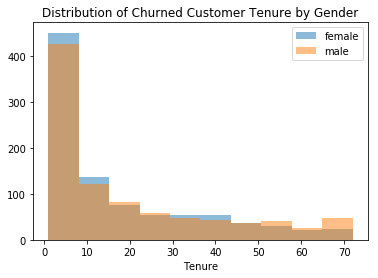

In [25]:
#Distribution of tenure of churned males and females
tenure_male = customers_churn.loc[customers_churn.gender == 'Male', 'tenure']
tenure_female = customers_churn.loc[customers_churn.gender == 'Female', 'tenure']
plt.hist(tenure_female, alpha=0.5, label='female')
plt.hist(tenure_male, alpha=0.5, label='male')
plt.xlabel('Tenure')
plt.title('Distribution of Churned Customer Tenure by Gender')
plt.legend(loc='upper right')
plt.show()

Previously in the exploratory analysis, I explored the tenure of the churned customers and discovered that most of the customers left after about 10 months.  A similar patterns emerges with both of the genders.  Both distributions are right skewed, and their distributions show a high level of overlap.     

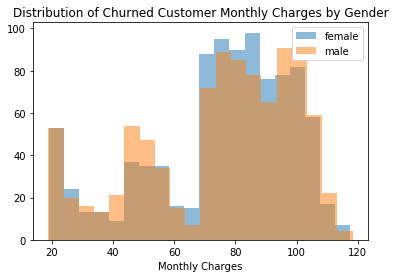

In [26]:
#Distribution of monthly charges of churned customers broken down by gender
charges_male = customers_churn.loc[customers_churn.gender == 'Male', 'MonthlyCharges']
charges_female = customers_churn.loc[customers_churn.gender == 'Female', 'MonthlyCharges']
plt.hist(charges_female, alpha=0.5, bins=20, label='female')
plt.hist(charges_male, alpha=0.5, bins=20, label='male')
plt.xlabel('Monthly Charges')
plt.title('Distribution of Churned Customer Monthly Charges by Gender')
plt.legend(loc='upper right')
plt.show()

The distribution of monthly charges between genders is a similar shape.  The shape is also similar to that of the distribution of monthly charges by churned customer (regardless of gender).  While the distributions are similar, there is some variation and would like to explore further to see if the differences between the genders and their monthly charges are significant. 

## Research Proposal: Customer Reacquisition Strategy A/B Testing

### Background

Deploying marketing strategies are costly for businesses and companies.  It is around five times cheaper to retain existing customers than to acquire new customers.  Reasons for this cost difference are repeat customers are already familiar with the product and experience being offered and the company already has information about those customers.  In addition, a significant portion of revenue is from repeat business, making it another reason to prioritize customer retention in a marketing strategy.   

However, there is another type of customer that falls between a new customer and an existing customer.  A churned customer is someone who had previously been a customer but stopped giving their repeat business to that company.  Churn rate, or attrition rate, is measured by number of customers lost in a given time period/number of customers at start of given time period, and the goal of any business is low attrition rate.  Like existing customers, businesses have a direct line to reach the churned customers and can easily customize a marketing strategy based on their previous purchases.  In this respect, it is reasonable to assume that a churned customer may be more costly to market to compared to an already loyal customer but less expensive than a new customer altogether.  Given that assumption, it is important for companies to formulate a well-rounded marketing strategy that includes targeting churned customers and successfully reactivate their buying power.

Telco is a telecommunications service provider that provides telephone, internet and data services; tech support; and TV and movie streaming.  The company offers these services on a month-to-month basis and one- and two-year contracts. 

In just the last 30 days, Telco has had 26.5% churn rate.  Almost 1900 out of the 7043 customers stopped their service with the company.  Of the churned customers, 88.5% utilized Telco’s services on a month-to-month basis and approximately 9% and 2.5% were in a one-year and two-year contract, respectively.  In addition, there was a higher turnover rate of those customers with lower tenures.  Approximately 50% of customer churn occurred within the first ten months of service.  

Knowing this information will inform a reacquisition email marketing strategy that targets those customers with low tenure on month-to-month contracts with the goal of getting them into one of the contracts.  Creating an exclusive offer will potentially incentivize churned customers to recommit their purchasing power to Telco for at least 12 or 24 months thereby converting churned customers back into existing customers.

Both emails will extend an offer for an exclusive deal on a one-year contract and a deal for the two-year contract.  Regardless of service previously provided, the email will offer the discount on any service with a one- or two-year contract. 
Since the goal is to regain the business of churned customers, it is important to make sure that those customers are coming back regularly and remaining customers, not just taking advantage of a discount and leaving again.  Only offering the one- and two-year contracts at a deal, instead of including a month-to-month discount helps to mitigate any short-term turnover rate.

The copy of the emails will be identical only differing in the offer presentations.  One offer will present the deal as savings in an annual percentage (‘Save 10% on a one-year contract or 20% on a two-year contract’) and the other will extend a sign-up offer of a free month (‘Get one free month on a one-year contract or two months on a two-year contract’).  Each deal remains equivalent in cost and an expiration date of one month applies to both offers. 

### Hypothesis
I hypothesize the email with the free month(s) will outperform the email with annual percent savings by converting a higher number of churned customers back into existing customers.  The null hypothesis is that there is no significant difference in conversion rates between the two versions of emails.

### Rollout plan  
There will be 1869 individuals in the sample.  The sample will be randomly divided into two groups: Group A and Group B.  Group A will receive the email offer of annual percent savings while Group B will receive the email offer with the free month(s).  Each initial and follow-up emails will be sent out at the same time.

The testing will take place over the span of one month with emails sent once each week.  The first email will be the initial offer.  If no conversion occurs or signficant difference achieved, a reminder email will be sent out exactly a week later.  Again, if no conversion or significant difference occurs, a third email will be sent out and finally, if applicable, a final ‘last chance’ email will be sent. 

The month of testing can be anytime of year except November and December.  Since those months are ‘holiday months’, it is not the ideal time to conduct a business-as-usual experiment.  It’s also imperative to run this experiment during times when there are no other deals that would apply to the sample or any other testing that could potentially affect the outcome of this A/B testing.

The data collected will be the date email is sent, the group the individual belongs to (A or B), week email was sent (1-4), if customer signed up for contract, which contract (1 or 2 year), and date customer signed up. 

Since the goal is to convert churned customers back into current customers, the key metric can be referred to as the win back rate.  This metric measures the number of churned customers who committed to one of the contracts after receiving the email.

The testing will be monitored throughout the month.  Every week, the previous weeks’ analytics will be evaluated to understand how each email is performing.  Three questions will be asked to explore the development of the testing. 

1.	How large is each group?  
2.	What is the win back rate of each group?  
3.	Is the experiment significant at this point? 

Each question builds on each other.  The size of each group will be used to determine the means of the win back rates of Group A and Group B.  From there a t-test can be performed using the means to obtain a t-statistic and p-value.  The A/B testing should have a degree of significance of 0.05. 

The testing is planned to run for four weeks.  Once there is statistical significance between the email versions, no more emails should go out.  Final analysis should begin a few weeks after the testing ceased to account for any time effect.  The final analysis will consist of answering those three questions and putting together some visuals that represent the data. 

An important thing to explore are the secondary metrics gathered during the data collection process.  The length of time it takes for a churned customer to convert and the clickthrough rate of the emails are two metrics that are useful to understand to inform successful future testing and marketing plans. 

### Next Steps
The bulk of my research proposal rolls out the plan to conduct an experiment to collect and analyze new data to inform marketing plans.  While that testing is vital to formulate an email marketing strategy for the reacquisition of customers, it is also worthwhile to test on the data that we already have on the churned customers.  Doing so will glean new and immediate insights that can be applied to current marketing plans and inform any future testing. 

The proposed experiment above targets all the month-to-month churned customers.  But how do the churned customers currently vary?  A natural place to start is to begin to breakdown the data by gender.  Since the number of females and males are nearly equivalent with 939 females and 930 males, it would be beneficial to which variables differ when compared between gender in the dataset.  The variables I will explore is time spent before leaving Telco (tenure) and how much money was spent overall (total charges). 

Here are two of the questions that I would like to explore:

<ol><li>Is there a significant difference between the amount of time males and females stayed at Telco before churning?</li>
    <li>Of the churned customers, which gender paid more for services on a monthly basis?</li>

#### Question 1: Significant differences between male and female tenure in churned customers

Determining if there is a signficant different in the number of months of each gender stays before leaving can help optimize customer retention.  For example, if one gender favors month-to-month while the other prefers a longer commitment, the marketing plan could include customization to the preference of that group and increase the chances of conversion or retention.  However, this type of targeted marketing plan rests on the assumption that there is a significant difference between the two samples, in this case gender.  

To evaluate if there is a signficant difference between the genders and tenure, I am going to conduct a t-test with a degree of significance of 0.05 (p-value = 0.05).  I hypothesize that females will have a higher tenure than males before they churn.


In [27]:
#Conducting t-test on tenure between genders
tenure_male = customers_churn.loc[customers_churn.gender == 'Male', 'tenure']
tenure_female = customers_churn.loc[customers_churn.gender == 'Female', 'tenure']

#Sample sizes
print('Female sample size:', len(tenure_female))
print('Male sample size:', len(tenure_male))
print()

#Means of each sample
print('Mean of female sample:', tenure_female.mean())
print('Mean of male sample:', tenure_male.mean())

#Are the means significantly different?
stats.ttest_ind(tenure_female, tenure_male)

Female sample size: 939
Male sample size: 930

Mean of female sample: 17.004259850905218
Mean of male sample: 18.963440860215055


Ttest_indResult(statistic=-2.1704405991958358, pvalue=0.030099163593646977)

Since the p-value is less than 0.05 the differences between the means are significant.  It was hypothesized that females would have a longer tenure than males, yet the result proves otherwise.  In fact, males overall were longer customers of Telco before churning.  


#### Question 2: Which gender paid the most for services on a monthly basis?  Is there a signficant difference in total cost between genders?

This question really highlights the bottom line - revenue.  From a business perspective, it is important to understand which customers are shelling out the most amount of money.  Of course, there are many factors that could affect the spending potential of a customer including age, income, marital status, and gender, so it can be difficult to pinpoint if there is just  one variable that explains which customers spend the most and why.  

Any number of factors can be compared between the churned customers, but like the question above I'm going to focus on comparing the monthly amount spent between genders.  The amount spent is referred to as monthly charges.  I hypothesize that churned male customers have signficantly higher monthly charges than churned female customers.   

In [28]:
#Conducting t-test on monthly charges between genders
monthly_charges_male = customers_churn.loc[customers_churn.gender == 'Male', 'MonthlyCharges']
monthly_charges_female = customers_churn.loc[customers_churn.gender == 'Female', 'MonthlyCharges']

#Sample sizes 
print('Female sample size:', len(monthly_charges_female))
print('Male sample size:', len(monthly_charges_male))
print()

#Means of each sample
print('Mean of female sample:', monthly_charges_female.mean())
print('Mean of male sample:', monthly_charges_male.mean())

#Are the means significantly different?
stats.ttest_ind(monthly_charges_female, monthly_charges_male)

Female sample size: 939
Male sample size: 930

Mean of female sample: 74.81208732694355
Mean of male sample: 74.06698924731184


Ttest_indResult(statistic=0.6528549315680438, pvalue=0.5139301855123509)

The p-value is greater than 0.05, so there is no significant difference between the monthly amount spent between the genders.  This test proves the null hypothesis of no difference between monthly spending true. 

### Discussion of Results
The results of both tests help guide any future marketing decisions, especially when it comes to A/B testing.  Knowing a signficant difference exists between genders allows a higher degree of message relevancy to sample population in A/B testing.  For example, in response to our analysis on Question 1, we can conduct an A/B test on an all male sample.  Since we know males on average stay longer beforing churning, we can craft a highly targeted message with different email variations that use their tenure to create a relevant call-to-action.  While tenure is not the best example, conceptually knowing any significant differences exist can provides some context in proposing impactful and more targeted A/B tests.

Knowing that significant differences don't exist, as in Question 2, is also very helpful.  Understanding who is spending the most and why is very important.  In this case, knowing that gender isn't a factor that influences monthly spending can also be important for the planning and implementation of marketing strategies.  If gender isn't a factor in understanding monthly amount spent then it wouldn't make sense to create campaigns for different genders based on <i>just</i> amount spent. 

### Conclusion
There are an endless amount of hypothesis tests that can be conducted with the data currently in the dataset.  For Telco, it would be advantageous to continue to conduct these tests to understand why customers differ and formulate marketing strategies to increase customer retention and overall revenue.  As I mentioned previously, there are so many factors that influence a customer's spending habits and being able to target the customer more relevantly would be beneficical.  
